In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# --- KROK 1: Generowanie danych ---
x_data = np.linspace(1, 100, 1000).reshape(-1, 1)
y_data = x_data**3 + 2*x_data

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(x_data)
y_scaled = scaler_y.fit_transform(y_data)

# --- KROK 2: Definiowanie modelu ---
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mse')

# --- KROK 3: Trenowanie ---
history = model.fit(X_scaled, y_scaled, epochs=150, batch_size=16, verbose=0)

# --- KROK 4: Predykcja i Ewaluacja ---
y_pred_scaled = model.predict(X_scaled)
mse_final = model.evaluate(X_scaled, y_scaled, verbose=0)

y_pred = scaler_y.inverse_transform(y_pred_scaled)

print(f"Osiągnięty błąd MSE (znormalizowany): {mse_final:.6f}")

C:\Users\Dawid\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Osiągnięty błąd MSE (znormalizowany): 0.000002


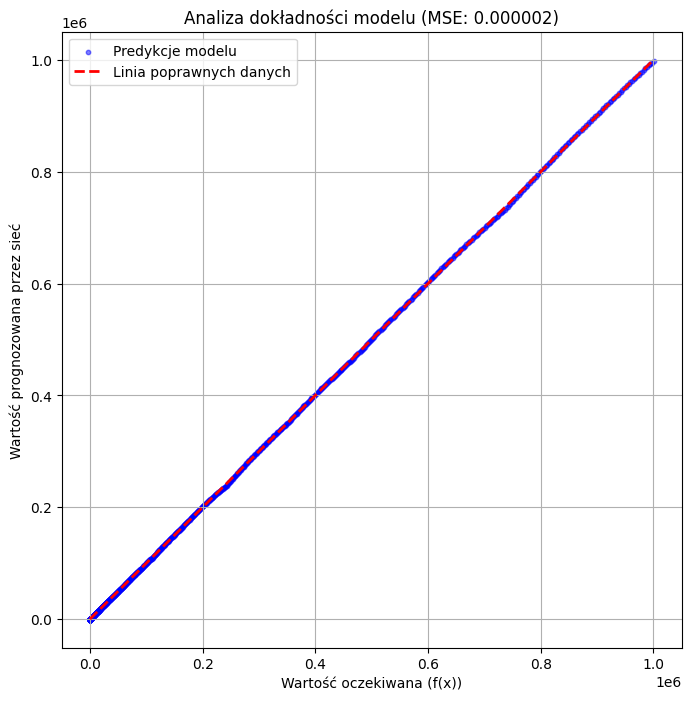

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(y_data, y_pred, color='blue', alpha=0.5, s=10, label='Predykcje modelu')
plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'r--', lw=2, label='Linia poprawnych danych')
plt.title(f'Analiza dokładności modelu (MSE: {mse_final:.6f})')
plt.xlabel('Wartość oczekiwana (f(x))')
plt.ylabel('Wartość prognozowana przez sieć')
plt.legend()
plt.grid(True)
plt.show()